# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Study data files
mouse_metadata_path = "../Module_5/data/Mouse_metadata.csv"
study_results_path = "../Module_5/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='left')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("../Module_5/data/merged_data.csv")

# Display the data table for preview
merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [67]:
# Checking the number of mice.
unique_mice = merged_df["Mouse ID"].unique()
print(len(unique_mice))

249


In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint
sorted_df = merged_df.sort_values(["Mouse ID", "Timepoint"])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicates
index = merged_df[merged_df.duplicated()].index[0]
print(index)

# Get the array
duplicate_ID = merged_df["Mouse ID"].iloc[index]

# Print the array
print(duplicate_ID)

137
g989


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a table of duplicate values
duplicate_table = merged_df.loc[merged_df["Mouse ID"] == duplicate_ID].reset_index(drop=True)

# Print the table
print(duplicate_table)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      g989          0           45.000000                 0     Propriva   
1      g989          0           45.000000                 0     Propriva   
2      g989          5           48.786801                 0     Propriva   
3      g989          5           47.570392                 0     Propriva   
4      g989         10           51.745156                 0     Propriva   
5      g989         10           49.880528                 0     Propriva   
6      g989         15           51.325852                 1     Propriva   
7      g989         15           53.442020                 0     Propriva   
8      g989         20           55.326122                 1     Propriva   
9      g989         20           54.657650                 1     Propriva   
10     g989         25           56.045564                 1     Propriva   
11     g989         30           59.082294                 1     Propriva   

In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_df = merged_df.loc[merged_df["Mouse ID"] != duplicate_ID].reset_index(drop=True)

# Print the DataFrame
dropped_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
# Checking the number of mice in the clean DataFrame.
unique_mice = dropped_df["Mouse ID"].unique()
print(len(unique_mice))

248


## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

unique_regimens = dropped_df["Drug Regimen"].unique()
statistics_df = pd.DataFrame()
for regimen in unique_regimens:
    df_filtered = dropped_df.loc[dropped_df["Drug Regimen"] == regimen]
    mean = df_filtered["Tumor Volume (mm3)"].mean()
    std = df_filtered["Tumor Volume (mm3)"].std()
    variance = df_filtered["Tumor Volume (mm3)"].var()
    median = df_filtered["Tumor Volume (mm3)"].median()
    sem = df_filtered["Tumor Volume (mm3)"].sem()
    statistics_df = statistics_df.append({'regimen': regimen, 'mean': mean, 'std': std, 'variance': variance, 'median': median, 'sem': sem}, ignore_index=True)
sorted_regimen_df = statistics_df.sort_values(["regimen"])
print(sorted_regimen_df)


     regimen       mean       std   variance     median       sem
0  Capomulin  40.675741  4.994774  24.947764  41.557809  0.329346
9   Ceftamin  52.591172  6.268188  39.290177  51.776157  0.469821
3  Infubinol  52.884795  6.567243  43.128684  51.820584  0.492236
1   Ketapril  55.235638  8.279709  68.553577  53.698743  0.603860
2   Naftisol  54.331565  8.134708  66.173479  52.509285  0.596466
8    Placebo  54.033581  7.821003  61.168083  52.288934  0.581331
7   Propriva  52.320930  6.622085  43.852013  50.446266  0.544332
5   Ramicane  40.216745  4.846308  23.486704  40.673236  0.320955
4   Stelasyn  54.233149  7.710419  59.450562  52.431737  0.573111
6  Zoniferol  53.236507  6.966589  48.533355  51.818479  0.516398


## Bar and Pie Charts

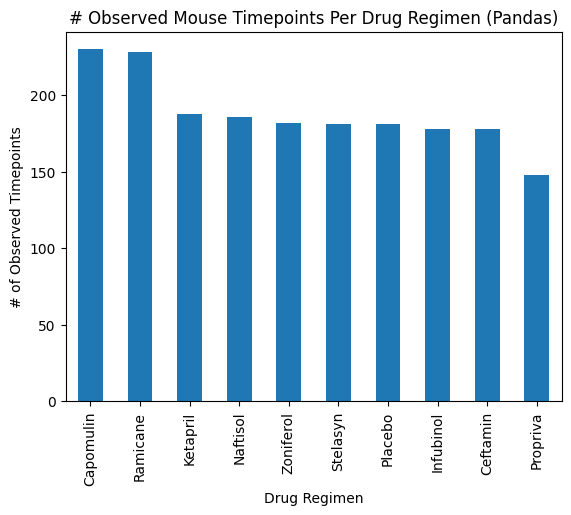

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = dropped_df['Drug Regimen'].value_counts()
counts.plot(kind = "bar")

# Set the title of the chart
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.title("# Observed Mouse Timepoints Per Drug Regimen (Pandas)")
plt.show()

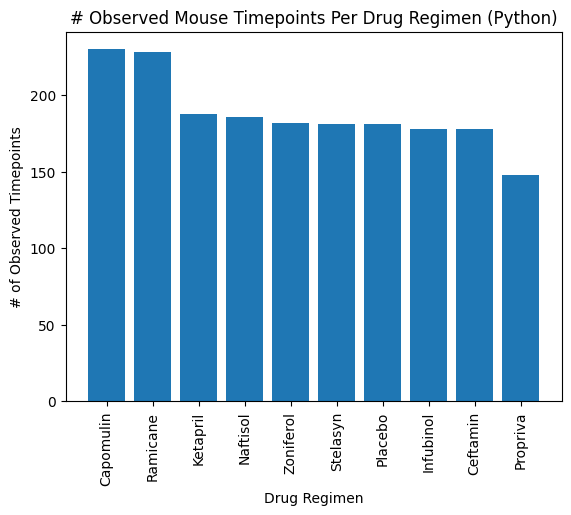

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = dropped_df['Drug Regimen'].value_counts()
#print(counts)
plt.bar(counts.index.values, counts.values)
#print(counts.values)
plt.title("# Observed Mouse Timepoints Per Drug Regimen (Python)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation=90)
plt.show()

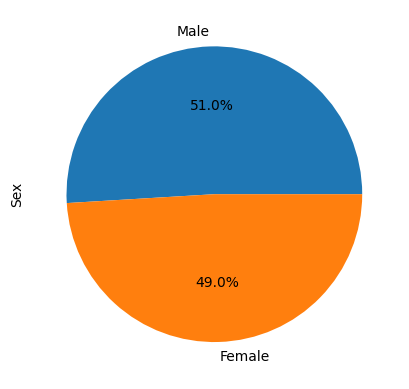

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a dataframe
counts = dropped_df["Sex"].value_counts()
counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

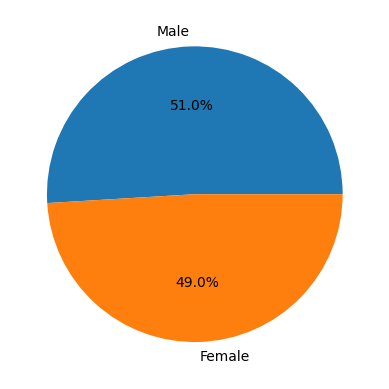

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = dropped_df["Sex"].value_counts()

labels = counts.index.values

# The values of each section of the pie chart
sizes = counts.values

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_df = dropped_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_df = max_tumor_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor_df.merge(dropped_df, on=["Mouse ID", "Timepoint"], how="left")

In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    #print(f"The lower quartile is: {lowerq}")
    #print(f"The upper quartile is: {upperq}")
    #print(f"The interquartile range is: {iqr}")
    #print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
#Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Infubinol's potential outliers: 31    36.321346
#Name: Tumor Volume (mm3), dtype: float64
#Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


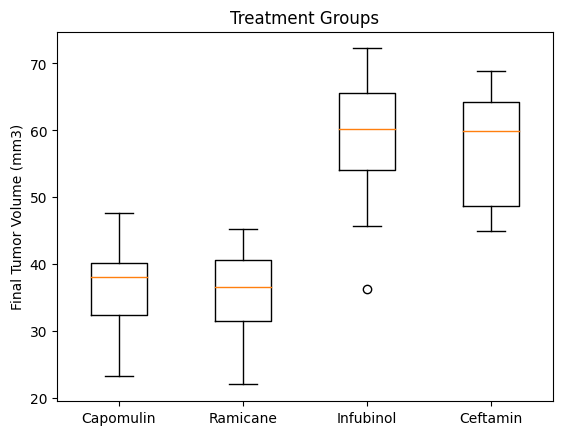

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#tumor_volume
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment Groups')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_list, labels=treatment_list)
plt.show()

## Line and Scatter Plots

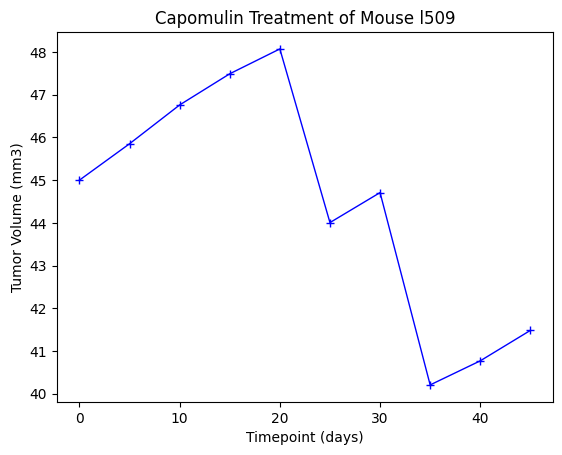

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_df = dropped_df.loc[dropped_df["Mouse ID"] == "l509"].reset_index(drop=True)
#print(mouse_l509)

# Set x axis to numerical value for Timepoint (days)
#x_axis = np.arange(0,50,10)
x_axis = mouse_l509_df['Timepoint']
#print(x_axis)

# Set y axis to numerical value for Tumor Volume (mm3)
y_data = mouse_l509_df['Tumor Volume (mm3)']
#print(y_data)

# Create a handle for each plot
line_plot = plt.plot(x_axis, y_data, marker="+",color="blue", linewidth=1)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

0      22
1      21
2      17
3      17
4      21
       ..
225    23
226    23
227    24
228    25
229    17
Name: Weight (g), Length: 230, dtype: int64
0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
225    40.728578
226    38.125164
227    47.685963
228    41.581521
229    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64


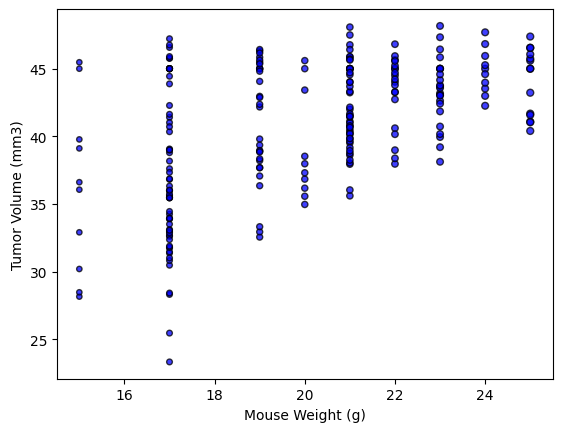

In [82]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = dropped_df.loc[dropped_df['Drug Regimen'] == "Capomulin"].reset_index(drop=True)

#print(capomulin_df)

# List of values from 0 to 26 each value being 1 greater than the last
x_axis_scatter = capomulin_df['Weight (g)']
print(x_axis_scatter)

# Set y axis to numerical value for Average Tumor Volume (mm3)
y_data_scatter = capomulin_df['Tumor Volume (mm3)']
print(y_data_scatter)
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_data_scatter, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis_scatter, alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis_scatter,y_data_scatter)
print(f"The correlation between mouse weight and the tumor volume is {round((correlation)[0],2)}")


The correlation between mouse weight and the tumor volume is 0.53


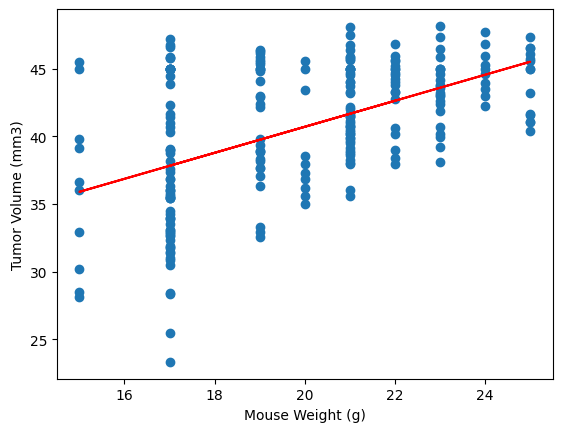

In [87]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_data_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_scatter,y_data_scatter)
plt.plot(x_axis_scatter,regress_values,"r-")
#plt.annotate(line_eq,(,),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()